当前操作系统: Windows
当前字体设置: ['SimHei', 'Microsoft YaHei', 'SimSun']
找到VOC数据文件: 双竹2025-01-10之后VOC数据.xlsx
提取的文件名: 双竹2025-01-10之后VOC数据
使用找到的功能-场景匹配分析文件: 生成结果/matches_analysis/refined_双竹2025-01-10之后VOC数据_rating_3_to_5_length_10_to_200_words_matches_analysis.xlsx
成功读取数据，共0条记录
警告: 数据文件中没有记录

空白图表已保存为: 生成结果/matches_analysis/双竹2025-01-10之后VOC数据_功能场景匹配四象限分析.png


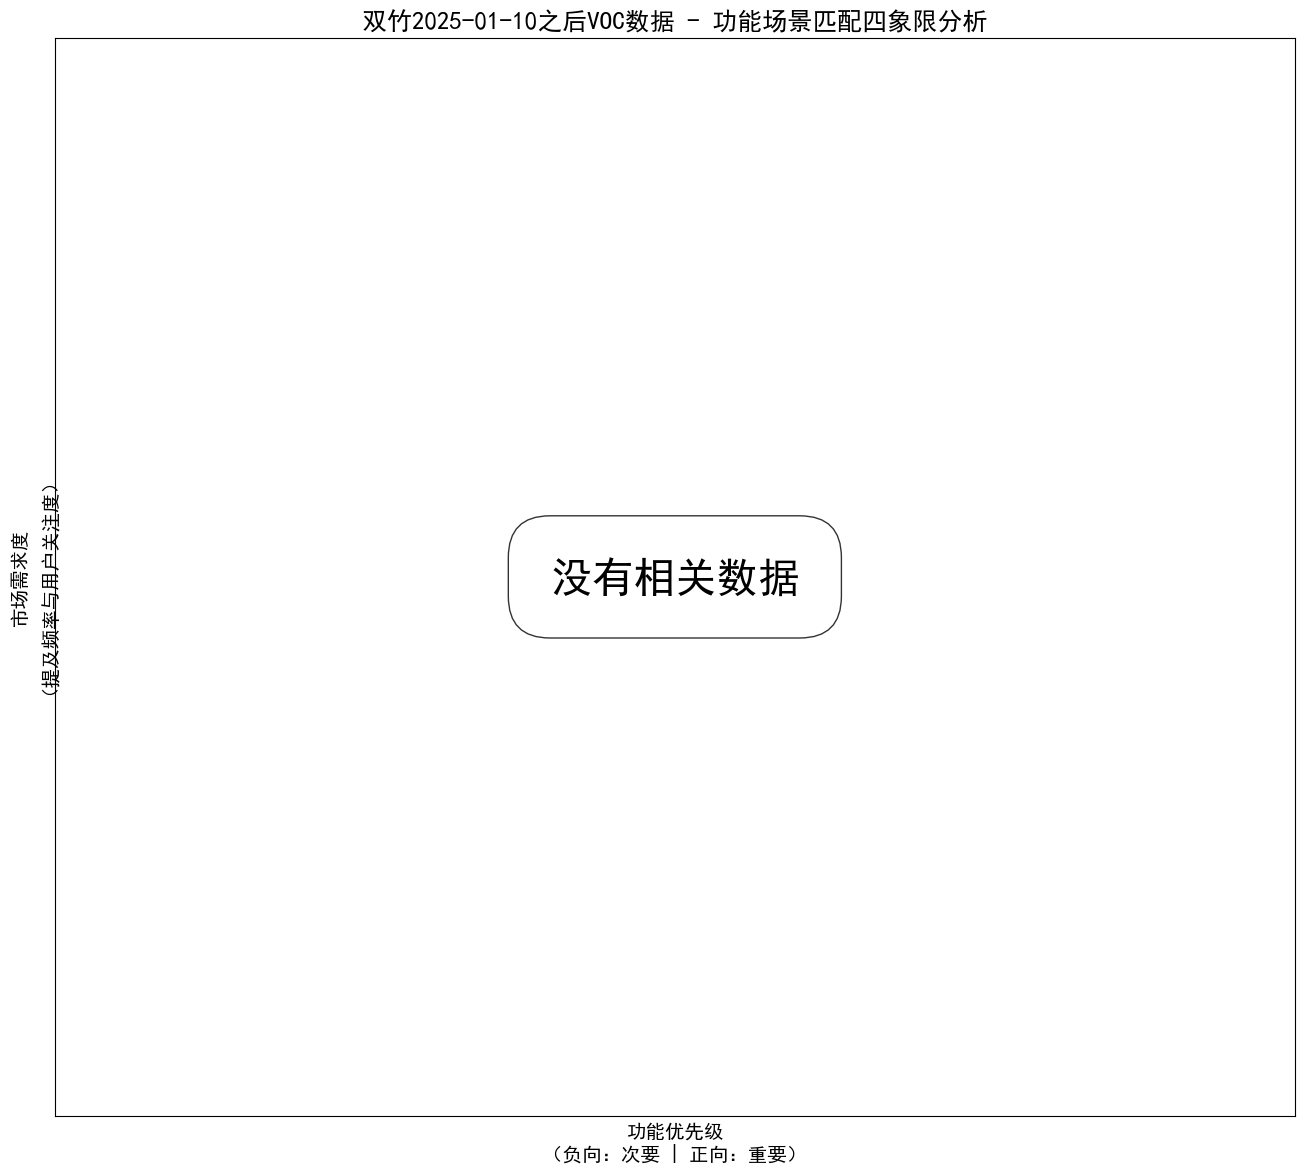


空白报告已保存到: 生成结果/matches_analysis/双竹2025-01-10之后VOC数据_功能场景匹配象限分析_完整列表.txt


SystemExit: 0

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import platform
import pandas as pd
import os
import re
from datetime import datetime
import spacy
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# 根据操作系统设置合适的中文字体
system = platform.system()
if system == 'Darwin':  # macOS
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Heiti TC', 'PingFang HK', 'Apple Color Emoji']
elif system == 'Windows':
    plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'SimSun']
else:  # Linux或其他
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'WenQuanYi Zen Hei']

# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False

print(f"当前操作系统: {system}")
print(f"当前字体设置: {plt.rcParams['font.sans-serif']}")

# 新路径设置
output_dir = "生成结果/matches_analysis/"
os.makedirs(output_dir, exist_ok=True)

# 获取文件名前缀
import glob
data_folder = "./Data"
voc_files = glob.glob(os.path.join(data_folder, "*VOC数据.xlsx"))

if not voc_files:
    print(f"在 {data_folder} 文件夹中未找到任何以'VOC数据.xlsx'结尾的文件")
    # 可以根据需要添加错误处理
else:
    # 如果找到多个匹配的文件，打印列表并使用第一个
    if len(voc_files) > 1:
        print(f"在 {data_folder} 文件夹中找到多个VOC数据文件:")
        for i, file in enumerate(voc_files):
            print(f"{i+1}. {os.path.basename(file)}")
        print(f"将使用第一个文件: {os.path.basename(voc_files[0])}")
    
    # 获取完整文件路径
    excel_filepath = voc_files[0]
    
    # 提取文件名（不含路径和扩展名）
    excel_filename = os.path.basename(excel_filepath)
    base_filename = os.path.splitext(excel_filename)[0]
    
    print(f"找到VOC数据文件: {excel_filename}")
    print(f"提取的文件名: {base_filename}")

# 从目录中找到匹配的分析结果文件
csv_files = [f for f in os.listdir(output_dir) if f.startswith('refined_') and f.endswith('_matches_analysis.xlsx')]
if csv_files:
    csv_file = os.path.join(output_dir, csv_files[0])  # 使用找到的第一个匹配文件
    print(f"使用找到的功能-场景匹配分析文件: {csv_file}")
else:
    # 如果找不到匹配文件，使用指定的默认路径
    csv_file = os.path.join(output_dir, f"{base_filename}_rating_0_to_5_length_10_to_200_words_matches_analysis.xlsx")
    print(f"未找到匹配文件，将使用默认路径: {csv_file}")

# 定义文本报告文件路径（后面会多次用到）
needs_txt_file = os.path.join(output_dir, f'{base_filename}_功能场景匹配象限分析_完整列表.txt')

# 读取CSV文件
try:
    data = pd.read_excel(csv_file)
    print(f"成功读取数据，共{len(data)}条记录")
    
    # 检查是否有数据
    if len(data) == 0:
        print("警告: 数据文件中没有记录")
        
        # 创建空白图并显示"没有相关数据"
        plt.figure(figsize=(16, 14))
        plt.text(0.5, 0.5, "没有相关数据", 
                 fontsize=30, ha='center', va='center',
                 bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=1'))
        
        # 设置坐标轴和标题
        plt.xlabel('功能优先级\n（负向：次要 | 正向：重要）', fontsize=14)
        plt.ylabel('市场需求度\n（提及频率与用户关注度）', fontsize=14)
        plt.title(f'{base_filename} - 功能场景匹配四象限分析', fontsize=18)
        
        # 隐藏坐标轴刻度
        plt.xticks([])
        plt.yticks([])
        
        # 保存图片
        output_filename = os.path.join(output_dir, f'{base_filename}_功能场景匹配四象限分析.png')
        plt.savefig(output_filename, dpi=300, bbox_inches='tight')
        print(f"\n空白图表已保存为: {output_filename}")
        
        plt.show()
        
        # 创建空白的文本报告
        with open(needs_txt_file, 'w', encoding='utf-8') as f:
            f.write(f"# {base_filename} 功能-场景匹配象限分析 - 完整列表\n")
            f.write(f"生成时间: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
            f.write("没有找到任何功能-场景匹配数据。\n")
        
        print(f"\n空白报告已保存到: {needs_txt_file}")
        
        import sys
        sys.exit(0)
        
except Exception as e:
    print(f"读取Excel文件失败: {e}")
    # 尝试不同的编码
    for encoding in ['utf-8', 'utf-8-sig', 'gbk', 'latin1']:
        try:
            data = pd.read_csv(csv_file, encoding=encoding)
            print(f"使用{encoding}编码成功读取数据，共{len(data)}条记录")
            
            # 检查是否有数据
            if len(data) == 0:
                print("警告: 数据文件中没有记录")
                
                # 创建空白图并显示"没有相关数据"
                plt.figure(figsize=(16, 14))
                plt.text(0.5, 0.5, "没有相关数据", 
                        fontsize=30, ha='center', va='center',
                        bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=1'))
                
                # 设置坐标轴和标题
                plt.xlabel('功能优先级\n（负向：次要 | 正向：重要）', fontsize=14)
                plt.ylabel('市场需求度\n（提及频率与用户关注度）', fontsize=14)
                plt.title(f'{base_filename} - 功能场景匹配四象限分析', fontsize=18)
                
                # 隐藏坐标轴刻度
                plt.xticks([])
                plt.yticks([])
                
                # 保存图片
                output_filename = os.path.join(output_dir, f'{base_filename}_功能场景匹配四象限分析.png')
                plt.savefig(output_filename, dpi=300, bbox_inches='tight')
                print(f"\n空白图表已保存为: {output_filename}")
                
                plt.show()
                
                # 创建空白的文本报告
                with open(needs_txt_file, 'w', encoding='utf-8') as f:
                    f.write(f"# {base_filename} 功能-场景匹配象限分析 - 完整列表\n")
                    f.write(f"生成时间: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
                    f.write("没有找到任何功能-场景匹配数据。\n")
                
                print(f"\n空白报告已保存到: {needs_txt_file}")
                
                import sys
                sys.exit(0)
                
            break
        except:
            continue
    else:
        print("无法读取数据文件，请检查文件路径和格式")
        
        # 创建空白图并显示"没有相关数据"
        plt.figure(figsize=(16, 14))
        plt.text(0.5, 0.5, "无法读取数据文件", 
                fontsize=30, ha='center', va='center',
                bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=1'))
        
        # 设置坐标轴和标题
        plt.xlabel('功能优先级\n（负向：次要 | 正向：重要）', fontsize=14)
        plt.ylabel('市场需求度\n（提及频率与用户关注度）', fontsize=14)
        plt.title(f'{base_filename} - 功能场景匹配四象限分析', fontsize=18)
        
        # 隐藏坐标轴刻度
        plt.xticks([])
        plt.yticks([])
        
        # 保存图片
        output_filename = os.path.join(output_dir, f'{base_filename}_功能场景匹配四象限分析.png')
        plt.savefig(output_filename, dpi=300, bbox_inches='tight')
        print(f"\n错误图表已保存为: {output_filename}")
        
        plt.show()
        
        # 创建错误报告
        with open(needs_txt_file, 'w', encoding='utf-8') as f:
            f.write(f"# {base_filename} 功能-场景匹配象限分析 - 错误报告\n")
            f.write(f"生成时间: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
            f.write("无法读取数据文件，请检查文件路径和格式。\n")
        
        print(f"\n错误报告已保存到: {needs_txt_file}")
        
        import sys
        sys.exit(1)

# 检查并转换列名
# 将功能-场景匹配数据映射到需求分析所需字段
column_mapping = {
    'Match': 'Need',
    'Count': 'Count',
    'Frequency': 'Frequency',
    'Avg_Rating': 'Importance_Score'
}

# 确保数据包含必要的列
for orig_col, new_col in column_mapping.items():
    if orig_col in data.columns and new_col not in data.columns:
        data[new_col] = data[orig_col]

# 查看数据列
print("\n数据列:", data.columns.tolist())

# 数据预处理
# 转换频率为数值
if 'Frequency' in data.columns:
    # 检查Frequency列的数据类型
    if data['Frequency'].dtype == 'object':
        # 如果是字符串，尝试转换百分比格式
        data['提及频率_num'] = data['Frequency'].str.rstrip('%').astype('float')
    else:
        # 如果已经是数值，直接乘以100
        data['提及频率_num'] = data['Frequency'].astype('float') * 100
else:
    print("警告: 未找到Frequency列，将使用Count列计算频率")
    total_count = data['Count'].sum()
    data['提及频率_num'] = data['Count'] / total_count * 100

# 设置重要性分数
if 'Importance_Score' in data.columns:
    data['重要性分数'] = data['Importance_Score']
elif 'Avg_Rating' in data.columns:
    # 将平均评分映射为重要性分数 (假设评分范围是1-5)
    data['重要性分数'] = data['Avg_Rating'] - 1  # 将1-5转换为0-4范围
else:
    print("警告: 未找到重要性分数列，将使用标准分布生成")
    # 使用标准正态分布生成一个随机分数，范围约为-3到3
    np.random.seed(42)  # 设置种子以保证可重复性
    data['重要性分数'] = np.random.normal(0, 1, size=len(data))
    # 归一化到0-5范围
    data['重要性分数'] = (data['重要性分数'] - data['重要性分数'].min()) / (data['重要性分数'].max() - data['重要性分数'].min()) * 5

# 打印数据概览
print("\n数据概览:")
print(f"总行数: {len(data)}")
print(f"功能-场景匹配列: {data['Match'].nunique() if 'Match' in data.columns else data['Need'].nunique()} 个唯一值")
print(f"重要性分数范围: {data['重要性分数'].min()} 到 {data['重要性分数'].max()}")
print(f"提及频率范围: {data['提及频率_num'].min()} 到 {data['提及频率_num'].max()}")

# 对数据分布进行对数变换，使长尾分布更加正常化
data['log_importance'] = np.log1p(data['重要性分数'])
data['log_frequency'] = np.log1p(data['提及频率_num'])

# 变换后的分布
print("\n对数变换后的分布:")
print(f"Log重要性分数范围: {data['log_importance'].min():.2f} 到 {data['log_importance'].max():.2f}")
print(f"Log提及频率范围: {data['log_frequency'].min():.2f} 到 {data['log_frequency'].max():.2f}")

# 查看相关性
corr = data['重要性分数'].corr(data['提及频率_num'])
print(f"\n重要性分数与提及频率的相关系数: {corr:.4f}")

# 尝试不同的象限划分方法
# 1. 基于对数变换后的分位数划分
x_log_median = data['log_importance'].median()
y_log_median = data['log_frequency'].median()

print("\n方法1: 对数变换后的中位数划分")
print(f"Log重要性分数中位数: {x_log_median:.2f}")
print(f"Log提及频率中位数: {y_log_median:.2f}")

data['quadrant_log_median'] = 0
data.loc[(data['log_importance'] >= x_log_median) & (data['log_frequency'] >= y_log_median), 'quadrant_log_median'] = 1
data.loc[(data['log_importance'] < x_log_median) & (data['log_frequency'] >= y_log_median), 'quadrant_log_median'] = 2
data.loc[(data['log_importance'] < x_log_median) & (data['log_frequency'] < y_log_median), 'quadrant_log_median'] = 3
data.loc[(data['log_importance'] >= x_log_median) & (data['log_frequency'] < y_log_median), 'quadrant_log_median'] = 4

# 2. 基于原始数据的特定分位数划分
# 使用25%/75%作为分割点
x_p25 = np.percentile(data['重要性分数'], 25)
x_p75 = np.percentile(data['重要性分数'], 75)
y_p25 = np.percentile(data['提及频率_num'], 25)
y_p75 = np.percentile(data['提及频率_num'], 75)

print("\n方法2: 25%/75%分位数划分")
print(f"重要性分数 25%分位: {x_p25:.2f}, 75%分位: {x_p75:.2f}")
print(f"提及频率 25%分位: {y_p25:.2f}, 75%分位: {y_p75:.2f}")

data['quadrant_quartile'] = 0
data.loc[(data['重要性分数'] >= x_p75) & (data['提及频率_num'] >= y_p75), 'quadrant_quartile'] = 1
data.loc[(data['重要性分数'] <= x_p25) & (data['提及频率_num'] >= y_p75), 'quadrant_quartile'] = 2
data.loc[(data['重要性分数'] <= x_p25) & (data['提及频率_num'] <= y_p25), 'quadrant_quartile'] = 3
data.loc[(data['重要性分数'] >= x_p75) & (data['提及频率_num'] <= y_p25), 'quadrant_quartile'] = 4
# 处理中间区域
middle_mask = ((data['重要性分数'] > x_p25) & (data['重要性分数'] < x_p75)) | ((data['提及频率_num'] > y_p25) & (data['提及频率_num'] < y_p75))
data.loc[middle_mask, 'quadrant_quartile'] = 5  # 中间区域标记为5

# 3. 使用K-means聚类将数据聚为4类，然后映射到象限
# 准备聚类用的特征
X = data[['log_importance', 'log_frequency']].values

# 检查数据量是否足够进行聚类
if len(data) >= 4:
    try:
        # 标准化
        X_std = (X - X.mean(axis=0)) / X.std(axis=0)
        X_std = np.nan_to_num(X_std)
        # 使用K-means聚类
        k = min(4, len(data))  # 如果数据量少于4，就使用数据量作为聚类数
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X_std)
        data['cluster'] = clusters

        # 获取聚类中心
        centers = kmeans.cluster_centers_
        # 还原聚类中心（去标准化）
        centers = centers * X.std(axis=0) + X.mean(axis=0)

        # 计算每个聚类中心相对于整体中心的位置
        overall_center = X.mean(axis=0)
        relative_positions = centers - overall_center

        # 根据聚类中心的位置映射到象限
        cluster_to_quadrant = {}
        for i in range(k):
            # 获取相对位置
            rel_x, rel_y = relative_positions[i]
            # 确定象限
            if rel_x >= 0 and rel_y >= 0:
                cluster_to_quadrant[i] = 1  # 右上
            elif rel_x < 0 and rel_y >= 0:
                cluster_to_quadrant[i] = 2  # 左上
            elif rel_x < 0 and rel_y < 0:
                cluster_to_quadrant[i] = 3  # 左下
            else:  # rel_x >= 0 and rel_y < 0
                cluster_to_quadrant[i] = 4  # 右下

        print("\n方法3: K-means聚类映射到象限")
        print("聚类中心:")
        for i in range(k):
            print(f"聚类 {i}: 重要性={np.exp(centers[i, 0])-1:.2f}, 频率={np.exp(centers[i, 1])-1:.2f}, 映射到象限 {cluster_to_quadrant[i]}")

        # 将聚类结果映射到象限
        data['quadrant_kmeans'] = data['cluster'].map(cluster_to_quadrant)
        
        # 如果聚类数量小于4，确保四个象限都有值
        if k < 4:
            print("警告: 聚类数量小于4，某些象限可能没有被分配数据点")
            # 确保所有象限都有一个默认值
            for q in range(1, 5):
                if q not in cluster_to_quadrant.values():
                    # 找到没有使用的象限，并将第一个聚类的部分数据点分配给它
                    first_cluster = data['cluster'].iloc[0]
                    n_rows = sum(data['cluster'] == first_cluster)
                    # 只有当有足够多的点时才分配
                    if n_rows > 1:
                        data.loc[data['cluster'] == first_cluster].iloc[:1, data.columns.get_loc('quadrant_kmeans')] = q
    except Exception as e:
        print(f"K-means聚类失败: {e}")
        print("将使用简单的中位数划分方法代替K-means")
        # 使用简单的中位数划分作为备选
        data['quadrant_kmeans'] = data['quadrant_log_median']
else:
    print("数据量不足以执行K-means聚类（需要至少4个数据点）")
    print("将使用简单的中位数划分方法代替")
    # 复制中位数划分结果
    data['quadrant_kmeans'] = data['quadrant_log_median']

# 4. 主成分分析方法 - 基于原始数据分布的主方向
# 计算回归线
data['frequency'] = data['提及频率_num']/100

# 使用对数变换调整频率，减少极端高频值的过度影响
data['adjusted_frequency'] = np.log1p(data['frequency'])  # log1p = log(1+x)

# 如果数据点超过1个，计算回归线
if len(data) > 1:
    try:
        slope, intercept = np.polyfit(data['log_importance'], data['adjusted_frequency'], 1)
        print("\n方法4: 基于调整频率的主成分划分")
        print(f"回归线: adjusted_frequency = {slope:.4f} * log_importance + {intercept:.4f}")

        # 计算每个点到回归线的垂直距离
        data['distance_to_regression'] = data['adjusted_frequency'] - (slope * data['log_importance'] + intercept)

        # 将点分为回归线上/下两部分
        above_regression = data['distance_to_regression'] >= 0
        below_regression = data['distance_to_regression'] < 0

        # 计算投影到回归线上的位置
        data['projection'] = (data['log_importance'] + slope * data['adjusted_frequency']) / (1 + slope**2)

        # 找到投影的中位数，用于左右划分
        projection_median = data['projection'].median()
        left_half = data['projection'] < projection_median
        right_half = data['projection'] >= projection_median

        # 组合得到象限
        data['quadrant_pca'] = 0
        data.loc[right_half & above_regression, 'quadrant_pca'] = 1  # 右上
        data.loc[left_half & above_regression, 'quadrant_pca'] = 2   # 左上
        data.loc[left_half & below_regression, 'quadrant_pca'] = 3   # 左下
        data.loc[right_half & below_regression, 'quadrant_pca'] = 4  # 右下
    except Exception as e:
        print(f"回归线计算失败: {e}")
        print("将使用简单的中位数划分方法代替")
        data['quadrant_pca'] = data['quadrant_log_median']
else:
    print("数据点不足以计算回归线（需要至少2个点）")
    # 如果只有一个数据点，直接分配到第一象限
    data['quadrant_pca'] = 1

# 5. 双阈值多分位数方法
# 根据数据量进行不同的分位数计算
if len(data) >= 10:
    # 对于数据量充足的情况使用多个阈值
    x_thresholds = [np.percentile(data['重要性分数'], p) for p in [10, 50, 90]]
    y_thresholds = [np.percentile(data['提及频率_num'], p) for p in [10, 50, 90]]

    print("\n方法5: 多阈值分位数划分")
    print(f"重要性分数阈值: 10%={x_thresholds[0]:.2f}, 50%={x_thresholds[1]:.2f}, 90%={x_thresholds[2]:.2f}")
    print(f"提及频率阈值: 10%={y_thresholds[0]:.2f}, 50%={y_thresholds[1]:.2f}, 90%={y_thresholds[2]:.2f}")

    # 初始化为0
    data['quadrant_multi'] = 0

    # 右上象限 (1): 高重要性，高频率
    data.loc[(data['重要性分数'] >= x_thresholds[2]) & (data['提及频率_num'] >= y_thresholds[2]), 'quadrant_multi'] = 1

    # 左上象限 (2): 低重要性，高频率
    data.loc[(data['重要性分数'] <= x_thresholds[0]) & (data['提及频率_num'] >= y_thresholds[2]), 'quadrant_multi'] = 2

    # 左下象限 (3): 低重要性，低频率
    data.loc[(data['重要性分数'] <= x_thresholds[0]) & (data['提及频率_num'] <= y_thresholds[0]), 'quadrant_multi'] = 3

    # 右下象限 (4): 高重要性，低频率
    data.loc[(data['重要性分数'] >= x_thresholds[2]) & (data['提及频率_num'] <= y_thresholds[0]), 'quadrant_multi'] = 4

    # 处理中间区域：根据相关性判断最近的象限
    middle_mask = data['quadrant_multi'] == 0
    for idx in data[middle_mask].index:
        importance = data.loc[idx, '重要性分数']
        frequency = data.loc[idx, '提及频率_num']
        
        # 根据点相对于中心的位置确定象限
        if importance >= x_thresholds[1]:
            if frequency >= y_thresholds[1]:
                data.loc[idx, 'quadrant_multi'] = 1  # 右上
            else:
                data.loc[idx, 'quadrant_multi'] = 4  # 右下
        else:
            if frequency >= y_thresholds[1]:
                data.loc[idx, 'quadrant_multi'] = 2  # 左上
            else:
                data.loc[idx, 'quadrant_multi'] = 3  # 左下
else:
    print("数据量不足以执行多阈值分位数划分（需要至少10个数据点）")
    # 使用简单的中位数划分替代
    data['quadrant_multi'] = data['quadrant_log_median']

# 6. 强制平衡划分法 - 按数据点数量强制平均分配到四个象限
if len(data) >= 4:
    # 按重要性分数和提及频率各自排序，取排名前50%和后50%
    importance_median_rank = len(data) // 2
    frequency_median_rank = len(data) // 2

    # 获取排序后的索引
    importance_sorted_idx = data['重要性分数'].argsort()
    frequency_sorted_idx = data['提及频率_num'].argsort()

    # 根据排名确定高/低重要性和高/低频率
    high_importance = np.zeros(len(data), dtype=bool)
    high_frequency = np.zeros(len(data), dtype=bool)

    high_importance[importance_sorted_idx[importance_median_rank:]] = True
    high_frequency[frequency_sorted_idx[frequency_median_rank:]] = True

    # 组合得到象限
    data['quadrant_balanced'] = 0
    data.loc[high_importance & high_frequency, 'quadrant_balanced'] = 1  # 右上
    data.loc[(~high_importance) & high_frequency, 'quadrant_balanced'] = 2  # 左上
    data.loc[(~high_importance) & (~high_frequency), 'quadrant_balanced'] = 3  # 左下
    data.loc[high_importance & (~high_frequency), 'quadrant_balanced'] = 4  # 右下

    print("\n方法6: 强制平衡划分")
    print("基于数据点排名强制平均分配到四个象限")
else:
    print("数据量不足以执行强制平衡划分（需要至少4个数据点）")
    # 如果只有1-3个数据点，则均匀分配到不同象限
    data['quadrant_balanced'] = 0
    if len(data) == 1:
        data.iloc[0, data.columns.get_loc('quadrant_balanced')] = 1  # 单个点放在第一象限
    elif len(data) == 2:
        data.iloc[0, data.columns.get_loc('quadrant_balanced')] = 1  # 第一点放在第一象限
        data.iloc[1, data.columns.get_loc('quadrant_balanced')] = 3  # 第二点放在第三象限
    elif len(data) == 3:
        data.iloc[0, data.columns.get_loc('quadrant_balanced')] = 1  # 第一点放在第一象限
        data.iloc[1, data.columns.get_loc('quadrant_balanced')] = 2  # 第二点放在第二象限
        data.iloc[2, data.columns.get_loc('quadrant_balanced')] = 4  # 第三点放在第四象限

# 检查所有方法的象限分布
methods = [
    ('对数中位数法', 'quadrant_log_median'),
    ('四分位数法', 'quadrant_quartile'),
    ('K-means聚类法', 'quadrant_kmeans'),
    ('主成分分析法', 'quadrant_pca'),
    ('多阈值分位数法', 'quadrant_multi'),
    ('强制平衡法', 'quadrant_balanced')
]

print("\n各方法象限分布对比:")
for method_name, column in methods:
    print(f"\n{method_name} 各象限分布:")
    
    # 排除中间区域的分析(如果有)
    if column == 'quadrant_quartile':
        valid_data = data[data[column] != 5]
        print(f"有效数据点: {len(valid_data)}/{len(data)}")
        value_counts = valid_data[column].value_counts().sort_index()
    else:
        value_counts = data[column].value_counts().sort_index()
    
    for q in range(1, 5):
        count = value_counts.get(q, 0)
        percentage = count / len(data) * 100
        print(f"象限 {q}: {count} 项 ({percentage:.1f}%)")
    
    # 计算标准差，评估均衡性
    counts = [value_counts.get(q, 0) for q in range(1, 5)]
    std = np.std(counts)
    mean = np.mean(counts)
    cv = std / mean if mean > 0 else float('inf')  # 变异系数
    
    print(f"标准差: {std:.2f}, 均值: {mean:.2f}, 变异系数: {cv:.2f}")

# 选择最均衡的方法 - 使用变异系数(CV)最小的方法
method_stats = []
for method_name, column in methods:
    if column == 'quadrant_quartile':
        valid_data = data[data[column] != 5]
        value_counts = valid_data[column].value_counts()
    else:
        value_counts = data[column].value_counts()
    
    counts = [value_counts.get(q, 0) for q in range(1, 5)]
    std = np.std(counts)
    mean = np.mean(counts)
    cv = std / mean if mean > 0 else float('inf')
    
    # 检查是否有全部四个象限
    has_all_quadrants = all(q in value_counts.index for q in range(1, 5))
    
    method_stats.append((method_name, column, cv, has_all_quadrants))

# 筛选出有所有象限的方法，按变异系数排序
valid_methods = [(name, col, cv) for name, col, cv, has_all in method_stats if has_all]

if valid_methods:
    best_method = min(valid_methods, key=lambda x: x[2])
    print(f"\n选择最均衡的方法: {best_method[0]} (变异系数: {best_method[2]:.2f})")
    data['quadrant'] = data[best_method[1]]
else:
    # 如果没有方法包含所有象限，选择CV最小的方法
    best_method = min(method_stats, key=lambda x: x[2])
    print(f"\n选择最均衡的方法: {best_method[0]} (变异系数: {best_method[2]:.2f}, 但并非所有象限都有数据)")
    data['quadrant'] = data[best_method[1]]
    
    # 对于数据量不足的情况，确保每个象限至少有一个数据点
    if len(data) >= 4:
        quadrants_present = set(data['quadrant'].unique())
        missing_quadrants = set(range(1, 5)) - quadrants_present
        
        # 如果缺少某些象限，从现有数据点复制
        if missing_quadrants and len(data) >= len(missing_quadrants):
            for i, q in enumerate(missing_quadrants):
                idx = data.index[i]
                data.loc[idx, 'quadrant'] = q
                print(f"将索引为 {idx} 的数据点分配给缺失的象限 {q}")

print("\n最终选定方法各象限分布:")
for q in range(1, 5):
    q_count = len(data[data['quadrant'] == q])
    q_percent = q_count / len(data) * 100
    print(f"象限 {q}: {q_count} 项 ({q_percent:.1f}%)")

# 计算原始重要性分数到"功能优先级"的映射
min_importance = data['重要性分数'].min()
max_importance = data['重要性分数'].max()
data['功能优先级'] = (data['重要性分数'] - min_importance) / (max_importance - min_importance) if max_importance > min_importance else 0.5

# 计算归一化频率
min_freq = data['提及频率_num'].min()
max_freq = data['提及频率_num'].max()
data['归一化频率'] = (data['提及频率_num'] - min_freq) / (max_freq - min_freq) if max_freq > min_freq else 0.5

# 计算综合得分
data['综合得分'] = 0.6 * data['功能优先级'] + 0.4 * data['归一化频率']

# 添加文本质量列（基于文本长度和其他特性）
def estimate_text_quality(text):
    if not isinstance(text, str) or len(text) < 3:
        return 0.3
    
    # 基于文本长度的质量估计
    base_score = min(1.0, max(0.3, len(text) / 50))
    
    # 检查是否包含产品相关术语
    product_terms = ["bag", "travel", "pocket", "space", "storage", "comfort", "design", "使用", "需要", "方便"]
    has_product_terms = any(term.lower() in text.lower() for term in product_terms)
    
    # 调整基础分数
    if has_product_terms:
        base_score += 0.1
    
    # 限制最终分数范围
    return min(1.0, max(0.1, base_score))

# 应用文本质量估计
need_column = 'Need' if 'Need' in data.columns else 'Match'
data['文本质量'] = data[need_column].apply(estimate_text_quality)

# 添加结合文本质量的最终得分
data['最终得分'] = 0.6 * data['综合得分'] + 0.4 * data['文本质量']

# 按最终得分排序
sorted_data = data.sort_values('最终得分', ascending=False)

# 选择前30个最高得分的项目进行可视化，确保每个象限至少有一些数据
top_n = min(30, len(data))  # 不超过数据总量
min_per_quadrant = min(3, max(1, len(data) // 4))  # 确保每象限最少项目，但不超过数据总量的四分之一

selected_data = pd.DataFrame()

# 先确保每个象限至少有min_per_quadrant个项目
quadrants_present = set(sorted_data['quadrant'].unique())
for q in range(1, 5):
    if q in quadrants_present:
        q_data = sorted_data[sorted_data['quadrant'] == q]
        if len(q_data) > 0:
            selected = q_data.head(min(min_per_quadrant, len(q_data)))
            selected_data = pd.concat([selected_data, selected])
            # 从sorted_data中移除已选择的项目
            sorted_data = sorted_data.drop(selected.index)

# 然后按得分填充剩余的位置
remaining_slots = top_n - len(selected_data)
if remaining_slots > 0 and len(sorted_data) > 0:
    additional = sorted_data.head(remaining_slots)
    selected_data = pd.concat([selected_data, additional])

# 在绘图前再次检查是否有数据
if len(selected_data) == 0:
    print("没有找到满足条件的数据，将显示空白图")
    
    # 创建空白图并显示"没有相关数据"
    plt.figure(figsize=(16, 14))
    plt.text(0.5, 0.5, "没有相关数据", 
             fontsize=30, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=1'))
    
    # 设置坐标轴和标题
    plt.xlabel('功能优先级\n（负向：次要 | 正向：重要）', fontsize=14)
    plt.ylabel('市场需求度\n（提及频率与用户关注度）', fontsize=14)
    plt.title(f'{base_filename} - 功能场景匹配四象限分析', fontsize=18)
    
    # 隐藏坐标轴刻度
    plt.xticks([])
    plt.yticks([])
    
    # 保存图片
    output_filename = os.path.join(output_dir, f'{base_filename}_功能场景匹配四象限分析.png')
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    print(f"\n空白图表已保存为: {output_filename}")
    
    plt.show()
    
    # 如果没有已经创建文本报告，创建一个空白的
    if not os.path.exists(needs_txt_file):
        with open(needs_txt_file, 'w', encoding='utf-8') as f:
            f.write(f"# {base_filename} 功能-场景匹配象限分析 - 完整列表\n")
            f.write(f"生成时间: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
            f.write("没有找到任何符合条件的功能-场景匹配数据。\n")
        
        print(f"\n空白报告已保存到: {needs_txt_file}")
    
    import sys
    sys.exit(0)

# 打印各象限选中的功能-场景匹配详情
print("\n## 所有象限的功能-场景匹配详细列表 (按最终得分排序)")
print("="*100)

quadrant_meanings = {
    1: '第一象限：核心功能区（高重要性，高频率）',
    2: '第二象限：基础功能区（低重要性，高频率）',
    3: '第三象限：潜在功能区（低重要性，低频率）',
    4: '第四象限：差异化功能区（高重要性，低频率）'
}

# 保存完整功能-场景匹配列表到文本文件
with open(needs_txt_file, 'w', encoding='utf-8') as f:
    f.write(f"# {base_filename} 功能-场景匹配象限分析 - 完整列表\n")
    f.write(f"生成时间: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
    
    for q in range(1, 5):
        q_data = data[data['quadrant'] == q].sort_values('最终得分', ascending=False)
        
        if len(q_data) > 0:
            f.write(f"\n## {quadrant_meanings[q]}\n")
            f.write(f"共有 {len(q_data)} 个功能-场景匹配项目\n\n")
            
            for i, (_, row) in enumerate(q_data.iterrows()):
                match_text = row['Match'] if 'Match' in data.columns else row['Need']
                f.write(f"{i+1}. {match_text}\n")
                f.write(f"   重要性分数: {row['重要性分数']:.2f}, 提及频率: {row['Frequency']}, 文本质量: {row['文本质量']:.2f}\n")
                f.write(f"   最终得分: {row['最终得分']:.2f} (综合得分: {row['综合得分']:.2f})\n\n")

print(f"\n完整功能-场景匹配列表已保存到: {needs_txt_file}")

# 绘制四象限图 - 使用最终得分排序的数据
# 准备绘图数据 - 保持各象限相对位置
for q in range(1, 5):
    q_mask = selected_data['quadrant'] == q
    q_data = selected_data[q_mask]
    
    if len(q_data) == 0:
        continue
    
    # 根据象限确定目标坐标范围
    if q == 1:  # 右上
        x_range = (0.1, 0.9)
        y_range = (0.1, 0.9)
    elif q == 2:  # 左上
        x_range = (-0.9, -0.1)
        y_range = (0.1, 0.9)
    elif q == 3:  # 左下
        x_range = (-0.9, -0.1)
        y_range = (-0.9, -0.1)
    else:  # 右下
        x_range = (0.1, 0.9)
        y_range = (-0.9, -0.1)
    
    # 使用功能优先级和提及频率作为相对位置分量
    def scale_to_range(values, target_min, target_max):
        """将值缩放到目标范围内"""
        v_min = np.min(values) if len(values) > 1 else values[0]
        v_max = np.max(values) if len(values) > 1 else values[0] + 0.001
        
        # 处理边界情况
        if v_max == v_min:
            middle = (target_max + target_min) / 2
            return np.full_like(values, middle)
        
        return (values - v_min) / (v_max - v_min) * (target_max - target_min) + target_min
    
    if len(q_data) > 1:
        # 象限内有多个点时进行缩放
        selected_data.loc[q_mask, 'x_plot'] = scale_to_range(
            q_data['重要性分数'].values, 
            target_min=x_range[0], 
            target_max=x_range[1]
        )
        
        selected_data.loc[q_mask, 'y_plot'] = scale_to_range(
            q_data['提及频率_num'].values,
            target_min=y_range[0],
            target_max=y_range[1]
        )
    else:
        # 象限内只有一个点时放置在中央
        selected_data.loc[q_mask, 'x_plot'] = (x_range[0] + x_range[1]) / 2
        selected_data.loc[q_mask, 'y_plot'] = (y_range[0] + y_range[1]) / 2

# 优化标签位置函数
def optimize_label_positions(df):
    """优化标签位置，确保不重叠"""
    # 复制数据
    result = df.copy()
    
    # 根据象限将数据点分组
    quadrants = {}
    for q in range(1, 5):
        quadrants[q] = result[result['quadrant'] == q].copy()
    
    # 获取象限边界
    def get_quadrant_bounds(q_num):
        if q_num == 1:  # 右上
            return (0.1, 0.9), (0.1, 0.9)
        elif q_num == 2:  # 左上
            return (-0.9, -0.1), (0.1, 0.9)
        elif q_num == 3:  # 左下
            return (-0.9, -0.1), (-0.9, -0.1)
        else:  # 右下
            return (0.1, 0.9), (-0.9, -0.1)
    
    # 对每个象限的数据点应用基于网格的位置优化
    for q in range(1, 5):
        q_data = quadrants[q]
        if len(q_data) == 0:
            continue
            
        x_range, y_range = get_quadrant_bounds(q)
        
        # 计算网格大小
        n_items = len(q_data)
        cols = int(np.ceil(np.sqrt(n_items)))
        rows = int(np.ceil(n_items / cols))
        
        # 计算格子大小
        cell_width = (x_range[1] - x_range[0]) / cols
        cell_height = (y_range[1] - y_range[0]) / rows
        
        # 对数据点按最终得分排序
        sorted_idx = q_data.sort_values('最终得分', ascending=False).index
        
        # 在网格中均匀放置点
        for i, idx in enumerate(sorted_idx):
            row = i // cols
            col = i % cols
            
            # 计算网格中的位置
            x = x_range[0] + cell_width * (col + 0.5)
            y = y_range[0] + cell_height * (row + 0.5)
            
            # 在第1、2象限，y坐标需要从上向下布局
            if q in [1, 2]:
                y = y_range[1] - cell_height * (row + 0.5)
            
            # 更新坐标
            result.loc[idx, 'x_plot'] = x
            result.loc[idx, 'y_plot'] = y
            
            # 记录文本长度
            match_text = result.loc[idx, 'Match'] if 'Match' in result.columns else result.loc[idx, 'Need'] 
            result.loc[idx, 'text_length'] = len(str(match_text))
            
    return result

# 优化标签位置
adjusted_data = optimize_label_positions(selected_data)

# 创建四象限图
plt.figure(figsize=(16, 14))

# 定义象限颜色和名称
quadrant_colors = {
    1: '#FF5733',  # 红色 - 第一象限（右上）
    2: '#3373FF',  # 蓝色 - 第二象限（左上）
    3: '#33A650',  # 绿色 - 第三象限（左下）
    4: '#A633FF'   # 紫色 - 第四象限（右下）
}

quadrant_names = {
    1: '第一象限：核心功能区',
    2: '第二象限：基础功能区',
    3: '第三象限：潜在功能区',
    4: '第四象限：差异化功能区'
}

# 绘制坐标轴和网格
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
plt.grid(True, linestyle='--', alpha=0.3)

# 绘制数据点，尺寸根据最终得分确定
for _, row in adjusted_data.iterrows():
    q = row['quadrant']
    
    # 点的大小与最终得分成正比，范围从80到400
    point_size = 80 + 320 * row['最终得分']
    
    # 边框宽度也与得分相关
    edge_width = 1 + row['最终得分'] * 1.5
    
    plt.scatter(
        row['x_plot'], 
        row['y_plot'],
        s=point_size,
        c=quadrant_colors[q],
        alpha=0.6,
        edgecolors='white',
        linewidth=edge_width
    )
    
    # 为每个数据点添加标签
    match_text = row['Match'] if 'Match' in adjusted_data.columns else row['Need']
    label = f"{match_text}"
    
    # 根据文本长度动态调整字体大小
    if 'text_length' in row and not pd.isna(row['text_length']):
        text_length = row['text_length']
    else:
        text_length = len(str(match_text))
        
    if text_length > 40:
        font_size = 8
    elif text_length > 30:
        font_size = 9
    elif text_length > 20:
        font_size = 10
    else:
        font_size = 11
    
    # 标签框样式
    lw = 1 + 2 * row['最终得分']
    bbox_props = dict(
        boxstyle=f"round,pad=0.5",
        fc="white", 
        ec=quadrant_colors[q], 
        alpha=0.95,
        lw=lw
    )
    
    plt.annotate(
        label, 
        (row['x_plot'], row['y_plot']),
        fontsize=font_size,
        weight='bold',
        ha='center',
        va='center',
        bbox=bbox_props
    )

# 添加象限标签名称
for q, name in quadrant_names.items():
    if q == 1:  # 右上
        pos_x, pos_y = 0.7, 0.9
    elif q == 2:  # 左上
        pos_x, pos_y = -0.7, 0.9
    elif q == 3:  # 左下
        pos_x, pos_y = -0.7, -0.9
    else:  # 右下
        pos_x, pos_y = 0.7, -0.9
    
    plt.text(
        pos_x, pos_y, name, 
        fontsize=12, 
        ha='center', 
        va='center',
        bbox=dict(
            facecolor=quadrant_colors[q], 
            alpha=0.1, 
            boxstyle='round,pad=0.6'
        )
    )

# 添加图表标题和坐标轴标签
plt.xlabel('功能优先级\n（负向：次要 | 正向：重要）', fontsize=14)
plt.ylabel('市场需求度\n（提及频率与用户关注度）', fontsize=14)
plt.title(f'{base_filename} - 功能场景匹配四象限分析', fontsize=18)

# 设置坐标轴范围
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.tight_layout()

# 保存图片
output_filename = os.path.join(output_dir, f'{base_filename}_功能场景匹配四象限分析.png')
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f"\n图表已保存为: {output_filename}")

plt.show()